In [1]:
#hack till I make it a real package..
import os

#using GPU, comment out if on CPU?
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '5'
import jax 
import jax.numpy as jnp

jax.config.update('jax_disable_jit', False)
import diffhydro as dh
from diffhydro.utils.io import athinput,athdf


In [2]:
#load athena ICs
import h5py
import jax.numpy as jnp
from diffhydro.utils.io import athinput,athdf

athena_outputs_loc = "/home/ben.horowitz/DiffHydro/tests/athena_ref_outputs/blast/"

ic_filename = "Blast.out2.00000.athdf"


ICs = athdf(athena_outputs_loc+ic_filename)



In [3]:

sol = jnp.zeros((5,100,100,100))
sol = sol.at[0].set(ICs["dens"])
sol = sol.at[-1].set(ICs["Etot"])

2025-10-09 16:05:56.359683: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.9.86). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a reco

In [25]:
eq = dh.equationmanager.EquationManager()
#eq.box_size = (128.0, 256.0,1.0)
ss = dh.signal_speed_Rusanov
solver = dh.HLLC(equation_manager=eq,signal_speed=ss)
cf = dh.ConvectiveFlux(eq,solver,dh.MUSCL3(limiter="VANLEER"))
hydrosim = dh.hydro(n_super_step=int(128),fluxes=[cf])#splitting_schemes=[[2,1,1,2],[1,2,2,1],])

'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)


In [26]:

params = {}
q = hydrosim.evolve(sol,params)

Traced<ShapedArray(float32[5,100,100,100])>with<DynamicJaxprTrace(level=1/0)>
dt [Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=1/0)>, 10000000000.0]


'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)
'+ptx89' is not a recognized feature for this target (ignoring feature)


Populating the interactive namespace from numpy and matplotlib


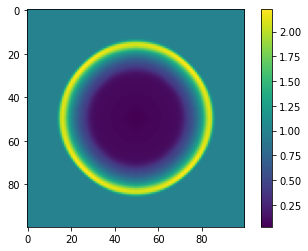

In [27]:
%pylab inline
imshow(q[0][0][50])
colorbar()

In [28]:
lt_filename = "Blast.out2.00217.athdf"

lt_file = h5py.File(athena_outputs_loc+lt_filename, 'r')

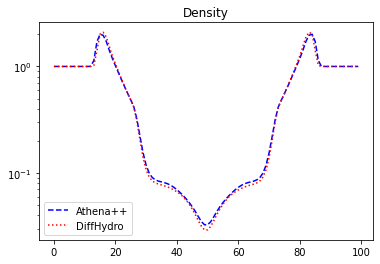

In [29]:
plt.semilogy(lt_file['cons'][0,0][50,50],"b--",label="Athena++")
plt.semilogy(q[0][0][50,50],"r:",label="DiffHydro")
plt.title("Density")
plt.legend()

Energy Profile


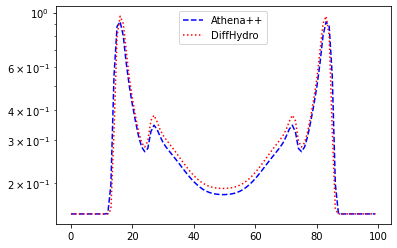

In [30]:
print("Energy Profile")
plt.semilogy(lt_file['cons'][1,0][50,50],"b--",label="Athena++")
plt.semilogy(q[0][-1][50,50],"r:",label="DiffHydro")
plt.legend()